# Project: Default of Credit Card Clients

## 1 - Business Understanding

Credit companies work to grant access to credit and facilitate consumption for people to live better. In financial terms, credit represents an amount of money that a company entrusts to another company or a person. The importance of credit is indisputable. it's responsible for the growth of the economy as it allows the increase in the consumption of goods and services, generating jobs and feeding back the increase in consumption.

Default is a failure to pay financial obligations and is one of the biggest concerns of any company. It is important to have bad debt control in order to avoid losses and protect the company's financial health.

Credit companies must focus on keeping default under control, for this they must carry out studies that allow them to understand the profile of their clients and carry out marketing campaigns aimed at clients with greater risk of default.

The base below presents information about customers of a credit company and in order to understand their payer profile and their risk of forecast, we will try to answer these two questions:

- How does the probability of default payment vary by categories of different demographic variables?
- Which variables are the strongest predictors of default payment?

Data: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

## Importing librarys

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from astropy.table import Table, Column

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

pd.options.display.max_columns = 50

## 2 - Data Understanding

### Access and Explore

#### Import data

In [370]:
cred = pd.read_csv('../data/archive.zip')

In [371]:
cred.rename(columns= {'default.payment.next.month': 'DEFAULT_PAYMENT'}, inplace= True)

#### Unique values

In [372]:
cred.duplicated().sum()

0

In [373]:
cred.ID.duplicated().sum()

0

- No duplicated values ou duplicated IDs

#### Null values

In [374]:
cred.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
DEFAULT_PAYMENT    0
dtype: int64

- No variable have null values

#### Zeros

In [375]:
(cred == 0).sum()

ID                     0
LIMIT_BAL              0
SEX                    0
EDUCATION             14
MARRIAGE              54
AGE                    0
PAY_0              14737
PAY_2              15730
PAY_3              15764
PAY_4              16455
PAY_5              16947
PAY_6              16286
BILL_AMT1           2008
BILL_AMT2           2506
BILL_AMT3           2870
BILL_AMT4           3195
BILL_AMT5           3506
BILL_AMT6           4020
PAY_AMT1            5249
PAY_AMT2            5396
PAY_AMT3            5968
PAY_AMT4            6408
PAY_AMT5            6703
PAY_AMT6            7173
DEFAULT_PAYMENT    23364
dtype: int64

- Some variable have zeros

#### Data types

In [376]:
print(cred.dtypes.unique())

[dtype('int64') dtype('float64')]


- It only has numerical values, but categorical variables such as SEX and MARRIAGE are observed.

In [377]:
cred.SEX.unique()

array([2, 1], dtype=int64)

In [378]:
cred.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [379]:
cred.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

###### This variable was encoded using LabelEncoding

**SEX:** Gender
    
    1 = Male
    2 = Female
    
**EDUCATION:** Education level

    0 = Unknown
    1 = Graduate school
    2 = University
    3 = High school
    4 = Others
    5 = Unknown
    6 = Unknown

**MARRIAGE:** Marital status

    0 = Unknown
    1 = Married
    2 = Single
    3 = Others

#### Number of defaulters

In [380]:
cred.DEFAULT_PAYMENT[cred.DEFAULT_PAYMENT==0].count()

data_rows = [['Paid out',cred.DEFAULT_PAYMENT[cred.DEFAULT_PAYMENT==0].count(), round(cred.DEFAULT_PAYMENT[cred.DEFAULT_PAYMENT==0].count()*100/cred.DEFAULT_PAYMENT.count(),2)],
             ['Default', cred.DEFAULT_PAYMENT[cred.DEFAULT_PAYMENT==1].count(), round(cred.DEFAULT_PAYMENT[cred.DEFAULT_PAYMENT==1].count()*100/cred.DEFAULT_PAYMENT.count(),2)]
            ]

t = Table(rows=data_rows, names=('Payment Status', 'No of clients','(%) of Total'))
print(t)

Payment Status No of clients (%) of Total
-------------- ------------- ------------
      Paid out         23364        77.88
       Default          6636        22.12


- About 22% of the base is marked as defaulting

#### Behavior of categorical variables

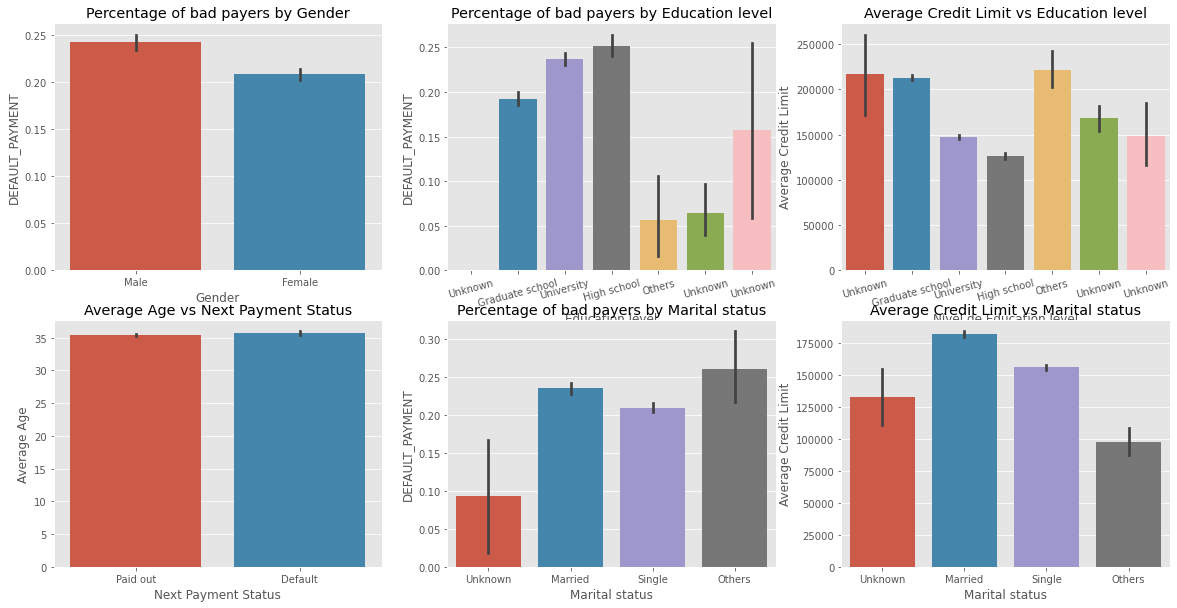

In [381]:
f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')

# Figura 1
ax = sns.barplot(x="SEX", y="DEFAULT_PAYMENT", data=cred,ax=axes[0,0])
ax.set_xticklabels(['Male','Female'])
ax.set_label('Pagadores (%)')
ax.set_xlabel('Gender')
ax.set_title("Percentage of bad payers by Gender");

# Figura 2
ax = sns.barplot(x="EDUCATION", y="DEFAULT_PAYMENT", data=cred,ax=axes[0,1])
ax.set_xticklabels(['Unknown', 'Graduate school', 'University', 'High school', 'Others', 'Unknown', 'Unknown'], rotation=15)
ax.set_label('Pagadores')
ax.set_xlabel('Education level')
ax.set_title("Percentage of bad payers by Education level");

# Figura 3
ax = sns.barplot(x="EDUCATION", y="LIMIT_BAL", data=cred,ax=axes[0,2])
ax.set_xticklabels(['Unknown', 'Graduate school', 'University', 'High school', 'Others', 'Unknown', 'Unknown'], rotation=15)
ax.set_ylabel('Average Credit Limit')
ax.set_xlabel('Nível de Education level')
ax.set_title('Average Credit Limit vs Education level');

# Figura 4
ax = sns.barplot(x="DEFAULT_PAYMENT", y="AGE", data=cred,ax=axes[1,0])
ax.set_xticklabels(['Paid out','Default'])
ax.set_ylabel('Average Age')
ax.set_xlabel('Next Payment Status')
ax.set_title("Average Age vs Next Payment Status");

# Figura 5
ax = sns.barplot(x="MARRIAGE", y="DEFAULT_PAYMENT", data=cred,ax=axes[1,1])
ax.set_xticklabels(['Unknown', 'Married', 'Single', 'Others'])
ax.set_label('Pagadores (%)')
ax.set_xlabel('Marital status')
ax.set_title("Percentage of bad payers by Marital status");

# Figura 6
ax = sns.barplot(x="MARRIAGE", y="LIMIT_BAL", data=cred,ax=axes[1,2])
ax.set_xticklabels(['Unknown', 'Married', 'Single', 'Others'])
ax.set_ylabel('Average Credit Limit')
ax.set_xlabel('Marital status')
ax.set_title('Average Credit Limit vs Marital status');

In the analysis of the graphs above, it is observed:
         
- Men have a higher default rate than women;
- There is a lower number of defaulters among people with higher education than among people with less education;
- People with more education have, on average, a higher limit than people with less education;
- There is no significant difference in the average age of good payers and bad payers;
- Married customers have a higher percentage of bad debtors than single customers;
- Married clients have, on average, a higher limit than single clients.

#### Percentage of bad payers by credit limit range

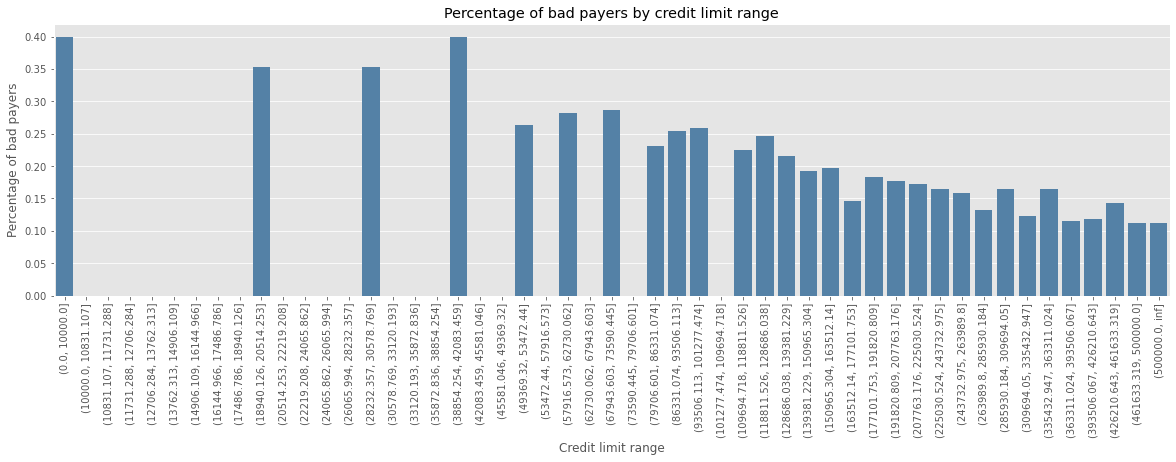

In [382]:
df = cred.copy()
bins = [0] + np.logspace(4,5.69897000434,50).tolist() + [np.inf]
df = df.DEFAULT_PAYMENT.groupby(pd.cut(df['LIMIT_BAL'], bins=bins)).mean().reset_index(name='Status Pagamento')

fig2 = plt.figure(figsize=(20,5))
ax = sns.barplot(x="LIMIT_BAL", y="Status Pagamento", data=df, color = 'steelblue')
ax.set_xticklabels(df.LIMIT_BAL.sort_values().unique(), rotation= 'vertical')
ax.set_ylabel('Percentage of bad payers')
ax.set_xlabel('Credit limit range')
ax.set_title("Percentage of bad payers by credit limit range");
del df

**Obs:** From the analysis of the graph above, it can be seen that customers with a lower credit limit have a higher percentage of bad debtors than those with a higher limit.

#### Number of clients by age

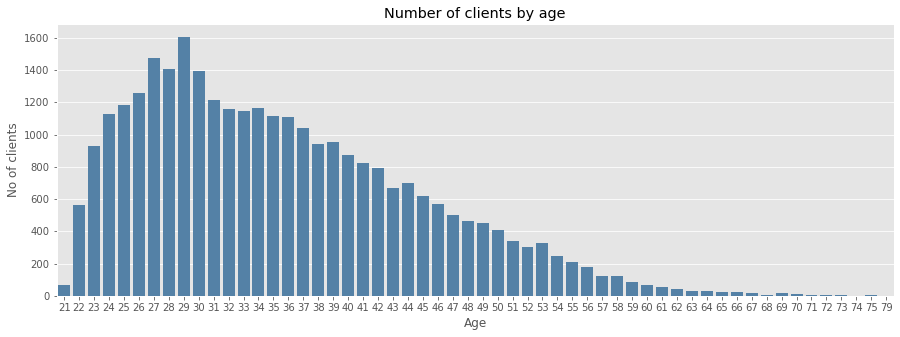

In [383]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'AGE', color="steelblue", data= cred)
plt.ylabel('No of clients')
plt.xlabel('Age')
plt.title("Number of clients by age");

**Obs:** The company serves different age groups. With the highest concentration between 20 and 40 years.

## 3 - Prepare Data

#### Copying raw dataset

In [384]:
dfcred = cred.copy()

**EDUCATION** and **MARRIAGE** columns present data that are not compatible with the variable. Observing that these data do not represent a large portion of the data and that there is a category **"Others"**, the labels **"Unknown"** will be replaced by **"Others"**.

#### Education

In [385]:
dfcred.EDUCATION = np.where(dfcred.EDUCATION == 5, 4, dfcred.EDUCATION)
dfcred.EDUCATION = np.where(dfcred.EDUCATION == 6, 4, dfcred.EDUCATION)
dfcred.EDUCATION = np.where(dfcred.EDUCATION == 0, 4, dfcred.EDUCATION)

In [386]:
dfcred.EDUCATION.unique()

array([2, 1, 3, 4], dtype=int64)

#### Marriage

In [387]:
dfcred.MARRIAGE = np.where(dfcred.MARRIAGE == 0, 3, dfcred.MARRIAGE)

In [388]:
dfcred.MARRIAGE.unique()

array([1, 2, 3], dtype=int64)

## Data Modeling

#### Preparation of training and testing dataframes

- Data Standardization (Using StandardScale)

In [389]:
X = dfcred.drop(['ID', 'DEFAULT_PAYMENT'], axis=1)  
y = dfcred['DEFAULT_PAYMENT']
scaler = StandardScaler()
print(scaler.fit(X))

x_std = scaler.transform(X)
X_std = pd.DataFrame(x_std,
                     index= X.index,
                     columns= X.columns)

dfcred_std = pd.concat([X_std, y], axis=1)

StandardScaler()


- Dimension reduction (PCA)

In [390]:
pca = PCA(n_components=3)
print(pca.fit(X))
print('Total variance of the 3 components: {} %'.format(round(sum(pca.explained_variance_ratio_)*100,2)))

x_pca = pca.transform(X)
X_pca = pd.DataFrame(x_pca)

dfcred_pca = pd.concat([X_pca, y], axis=1)

PCA(n_components=3)
Total variance of the 3 components: 93.63 %


- Split of data

In [391]:
# Split dados padrão

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

# Split dados standalized
X_std = dfcred_std.drop('DEFAULT_PAYMENT', axis=1)  
y_std = dfcred_std['DEFAULT_PAYMENT']

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std,y_std, test_size=0.2, stratify=y_std, random_state=42)

# Split dados pós-PCA

X_pca = dfcred_pca.drop('DEFAULT_PAYMENT', axis=1)  
y_pca = dfcred_pca['DEFAULT_PAYMENT']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y_pca, test_size=0.2, stratify=y_pca, random_state=42)

### Fit Models

#### Classification Models
 - Logistic Regression
 - Decision Tree
 - Random Forest

#### Logistic Regression (Standart)

##### Model Training

##### Model Evaluation

In [392]:
LR = LogisticRegression(C=4.4737, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print('Accuracy:', accuracy_score(y_pred,y_test))

Accuracy: 0.7788333333333334


##### Viewing metrics

In [393]:
## 5-fold cross-validation 
cv_scores = cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average accuracy (CV = 5): {}".format(round(np.mean(cv_scores),4)),
      ", standard deviation: {}".format(round(np.std(cv_scores),4)))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000


Average accuracy (CV = 5): 0.7788 , standard deviation: 0.0002


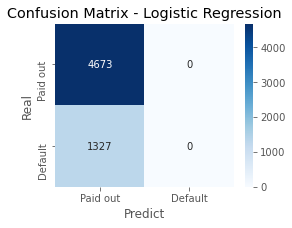

In [394]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Paid out', 'Default'], 
            yticklabels = ['Paid out', 'Default'])
plt.ylabel('Real')
plt.xlabel('Predict')
plt.title("Confusion Matrix - Logistic Regression");

#### Logistic Regression (Standardized)

##### Model Training

##### Model Evaluation

In [395]:
LR_std = LogisticRegression(C=4.7368, random_state=0)
LR_std.fit(X_train_std, y_train_std)
y_pred_std = LR_std.predict(X_test_std)

print('Accuracy:', accuracy_score(y_pred_std,y_test_std))

Accuracy: 0.808


##### Viewing metrics

In [396]:
## 5-fold cross-validation 
cv_scores_std = cross_val_score(LR_std, X_std, y_std, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test_std, y_pred_std))
print()
print("Average accuracy (CV = 5): {}".format(round(np.mean(cv_scores_std),4)),
      ", standard deviation: {}".format(round(np.std(cv_scores_std),4)))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Average accuracy (CV = 5): 0.8098 , standard deviation: 0.0046


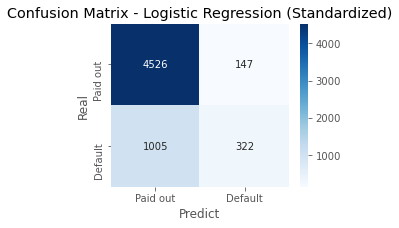

In [397]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test_std,LR_std.predict(X_test_std))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Paid out', 'Default'], 
            yticklabels = ['Paid out', 'Default'])
plt.ylabel('Real')
plt.xlabel('Predict')
plt.title("Confusion Matrix - Logistic Regression (Standardized)");

#### Logistic Regression (Standardized + PCA)

##### Model Training

##### Model Evaluation

In [398]:
LR_pca = LogisticRegression(C=4.7368, random_state=0)
LR_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = LR_pca.predict(X_test_pca)

print('Accuracy:', accuracy_score(y_pred_pca,y_test_pca))

Accuracy: 0.5016666666666667


##### Viewing metrics

In [399]:
## 5-fold cross-validation 
cv_scores_pca = cross_val_score(LR_pca, X_pca, y_pca, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test_pca, y_pred_pca))
print()
print("Average accuracy (CV = 5): {}".format(round(np.mean(cv_scores_pca),4)),
      ", standard deviation: {}".format(round(np.std(cv_scores_pca),4)))


              precision    recall  f1-score   support

           0       0.84      0.45      0.58      4673
           1       0.26      0.69      0.38      1327

    accuracy                           0.50      6000
   macro avg       0.55      0.57      0.48      6000
weighted avg       0.71      0.50      0.54      6000


Average accuracy (CV = 5): 0.5111 , standard deviation: 0.0221


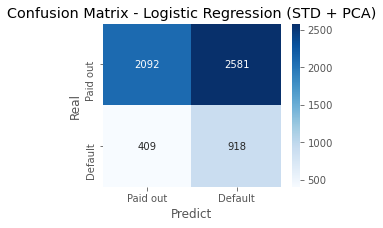

In [400]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test_pca,LR_pca.predict(X_test_pca))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Paid out', 'Default'], 
            yticklabels = ['Paid out', 'Default'])
plt.ylabel('Real')
plt.xlabel('Predict')
plt.title("Confusion Matrix - Logistic Regression (STD + PCA)");

#### Decision Tree

##### Model Training

##### Model Evaluation

In [401]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)

print('Accuracy:', accuracy_score(y_pred,y_test))

Accuracy: 0.808


##### Viewing metrics

In [402]:
## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average accuracy (CV = 5): {}".format(round(np.mean(cv_scores),4)), 
      ", standard deviation: {}".format(round(np.std(cv_scores),4)))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.63      0.33      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.78      6000


Average accuracy (CV = 5): 0.8121 , standard deviation: 0.0085


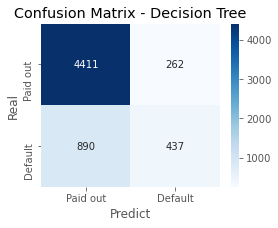

In [403]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Paid out', 'Default'], 
            yticklabels = ['Paid out', 'Default'])
plt.ylabel('Real')
plt.xlabel('Predict')
plt.title("Confusion Matrix - Decision Tree");

#### Random Forest

##### Treino do Modelo

##### Uso do Modelo

In [404]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)

print('Accuracy:', accuracy_score(y_pred,y_test))

Accuracy: 0.8171666666666667


##### Visualização das métricas

In [405]:
## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average accuracy (CV = 5): {}".format(round(np.mean(cv_scores),4)),
      ", standard deviation: {}".format(round(np.std(cv_scores),4)))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Average accuracy (CV = 5): 0.8203 , standard deviation: 0.0093


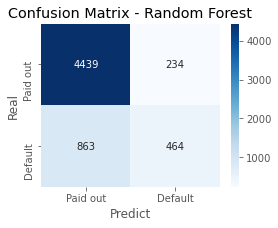

In [406]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Paid out', 'Default'], 
            yticklabels = ['Paid out', 'Default'])
plt.ylabel('Real')
plt.xlabel('Predict')
plt.title("Confusion Matrix - Random Forest");

### Validate the model

#### Final result of all models

In [407]:
# Append different models
models = []

# Logistic Regression
models.append(('Logistic Regression (Standart)',
               LogisticRegression(C=4.4737, random_state=0),'none'))

# Logistic Regression (with standardized data)
models.append(('Logistic Regression (Standardized)',
               LogisticRegression(C=4.7368, random_state=0),'std'))

# Logistic Regression with standardized and important features
models.append(('Logistic Regression (Standardized + PCA)',
               LogisticRegression(C=4.7368, random_state=0),'pca'))

# Decision Tree
models.append(('Decision Tree (Standart)', 
              DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0),'none'))

# Random Forest Classifier
models.append(('Random Forest (Standart)', 
              RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0), 'none'))

# Evaluate each model
results = []
names = []
scoring = ['accuracy', 'recall', 'roc_auc']
cv = 5

for name, model, Std in models:
    if Std == 'std':
        cv_results = cross_validate(model, X_std, y, cv=cv, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Acurácia %f (%f), Recall %f (%f)" % (name,
                                                        cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std(),
                                                        cv_results['test_recall'].mean(), cv_results['test_recall'].std())
        msg = '%s: Done' % (name)
        print(msg)
    elif Std == 'none':
        cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Acurácia %f (%f), Recall %f (%f)" % (name,
                                                        cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std(),
                                                        cv_results['test_recall'].mean(), cv_results['test_recall'].std())
        msg = '%s: Done' % (name)
        print(msg)
    else:
        cv_results = cross_validate(model, X_pca, y, cv=cv, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: Acurácia %f (%f), Recall %f (%f)" % (name,
                                                        cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std(),
                                                        cv_results['test_recall'].mean(), cv_results['test_recall'].std())
        msg = '%s: Done' % (name)
        print(msg)

Logistic Regression (Standart): Done
Logistic Regression (Standardized): Done
Logistic Regression (Standardized + PCA): Done
Decision Tree (Standart): Done
Random Forest (Standart): Done


In [408]:
results_acurracy = [results[i]['test_accuracy'] for i in range(0,5)]
results_recall = [results[i]['test_recall'] for i in range(0,5)]
results_roc_auc = [results[i]['test_roc_auc'] for i in range(0,5)]

In [409]:
data_rows = [[models[i][0][:models[i][0].find('(')].strip(),
              models[i][0][models[i][0].find('(')+1:models[i][0].find(')')].strip(),
              round(results_acurracy[i].mean(),4),
              round(results_recall[i].mean(),4),
              round(results_roc_auc[i].mean(),4)
             ] for i in range(0,5)]   

t = Table(rows=data_rows, names=('Model', 'Data', 'Accuracy', 'Recall', 'AUC'))
print(t)

       Model               Data        Accuracy Recall  AUC  
------------------- ------------------ -------- ------ ------
Logistic Regression           Standart   0.7788 0.0006 0.6536
Logistic Regression       Standardized   0.8098 0.2363 0.7217
Logistic Regression Standardized + PCA   0.5111 0.7197 0.6244
      Decision Tree           Standart   0.8121 0.3229 0.7413
      Random Forest           Standart   0.8203 0.3546 0.7753


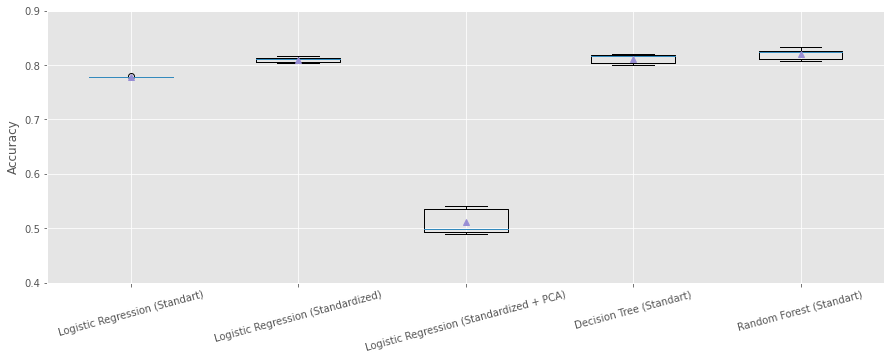

In [410]:
# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

# Create a figure instance
fig = plt.figure(1, figsize=(15, 5))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(results_acurracy, showmeans=True)
ax.set_xticklabels(names, rotation = 15)
ax.set_ylabel('Accuracy')
ax.set_ylim([0.4 ,0.9])

fig.show()

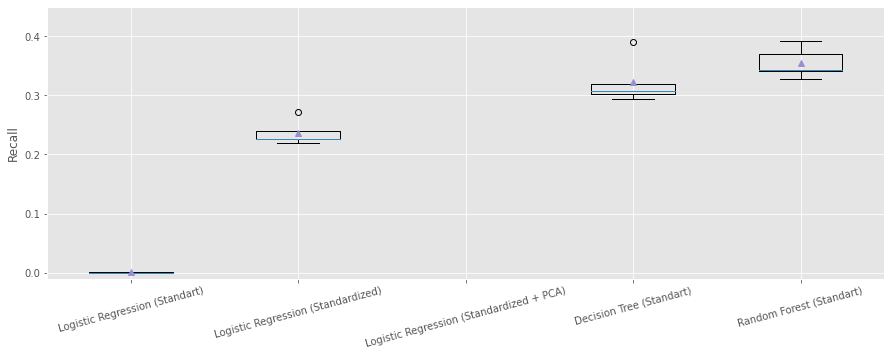

In [411]:
# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

# Create a figure instance
fig = plt.figure(1, figsize=(15, 5))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(results_recall, showmeans=True)
ax.set_xticklabels(names, rotation = 15)
ax.set_ylabel('Recall')
ax.set_ylim([-0.01, 0.45])

fig.show()

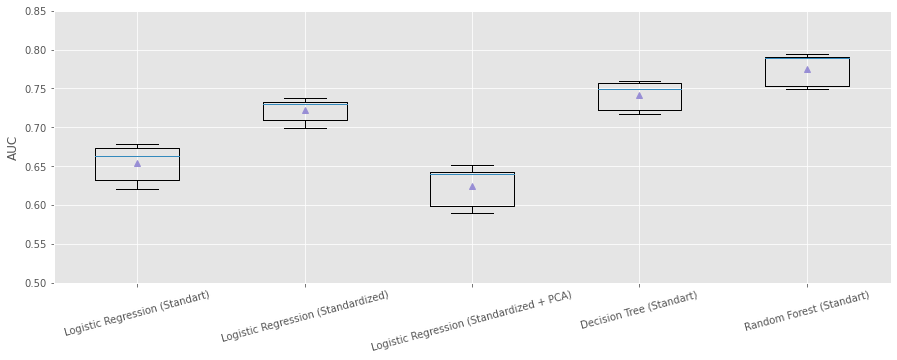

In [412]:
# http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

# Create a figure instance
fig = plt.figure(1, figsize=(15, 5))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(results_roc_auc, showmeans=True)
ax.set_xticklabels(names, rotation = 15)
ax.set_ylabel('AUC')
ax.set_ylim([0.5, 0.85])

fig.show()

# Chosen model

Model chosen was the DecisionTree, as explained at the beginning of the case, three parameters were taken into account for the choice: Accuracy, Recall and AUC. The DecisionTree, RandomForest and LogiscticRegression (Std) models presented values very close in these three aspects.

DecisionTree, however, showed less variation between executions performed in the Recall value. With all other parameters close, this ended up being the decision point.

In [413]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
22788,160000.0,2,2,2,33,2,2,3,2,0,0,161771.0,172632.0,168541.0,164310.0,162681.0,163005.0,15000.0,0.0,0.0,6100.0,12300.0,6100.0
29006,150000.0,2,1,2,34,1,-1,-1,-2,-2,-2,0.0,53.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0
16950,10000.0,1,2,1,50,1,2,0,0,0,0,10171.0,8150.0,8446.0,8067.0,8227.0,8400.0,2.0,1281.0,1134.0,294.0,305.0,1000.0
22280,220000.0,2,1,2,29,0,0,0,0,0,0,206879.0,211037.0,215139.0,218513.0,131660.0,134346.0,9100.0,9000.0,7887.0,4800.0,4900.0,6000.0
11346,310000.0,2,1,2,32,1,-2,-1,0,0,-2,0.0,0.0,326.0,326.0,-235.0,-235.0,0.0,326.0,0.0,0.0,0.0,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,100000.0,2,2,2,31,0,0,0,0,0,0,91344.0,92309.0,94421.0,97486.0,97604.0,97241.0,3309.0,4421.0,5486.0,3400.0,3541.0,3894.0
13921,120000.0,2,2,2,24,0,0,0,0,0,2,112336.0,113351.0,115515.0,113948.0,122127.0,121962.0,4200.0,4100.0,4100.0,10000.0,4560.0,0.0
3794,120000.0,2,1,2,24,0,0,0,0,0,0,75796.0,76004.0,67187.0,49924.0,33188.0,19826.0,3700.0,2023.0,2016.0,2000.0,1200.0,1000.0
27565,360000.0,1,1,1,57,1,-2,-1,-1,-1,-2,0.0,0.0,860.0,246.0,-46.0,-46.0,0.0,860.0,246.0,0.0,0.0,0.0


In [414]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)

# Predict
y_pred = Tree.predict(X_test)

# Predict Proba
y_pred_prob = Tree.predict_proba(X_test)[:,1]

## Viewing some metrics

In [415]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


print('Acurácia:', round(accuracy_score(y_pred, y_test), 4))
print('AUC:', round(roc_auc_score(y_pred, y_pred_prob), 4))
print('F1:', round(f1_score(y_pred, y_pred), 4))

Acurácia: 0.808
AUC: 1.0
F1: 1.0


### Plot ROC

In [416]:
from sklearn.metrics import roc_curve
import plotly.graph_objects as go

false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_pred_prob)

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x= false_positive_rate,
        y= true_positive_rate,
        mode='lines',
        name='ROC curve'))
fig.add_trace(
    go.Scatter(
        x= [0, 1],
        y= [0, 1],
        line = dict(dash= 'dash'),
        name='0.5'))
pass

In [417]:
fig.show()

### Plot Precision-Recall Curve

In [418]:
from sklearn.metrics import precision_recall_curve
import plotly.graph_objects as go

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x= recall,
        y= precision,
        mode='lines',
        name='PR curve'))
fig.add_trace(
    go.Scatter(
        x= [0, 1],
        y= [0, 0],
        line = dict(dash= 'dash'),
        name='0.0'))
pass

In [419]:
fig.show()

## 5 - Evaluation

### Question 1 - How does the probability of default payment vary by categories of different demographic variables?

We can analyze the default behavior in each of the categorical variables through the graphic visualization.

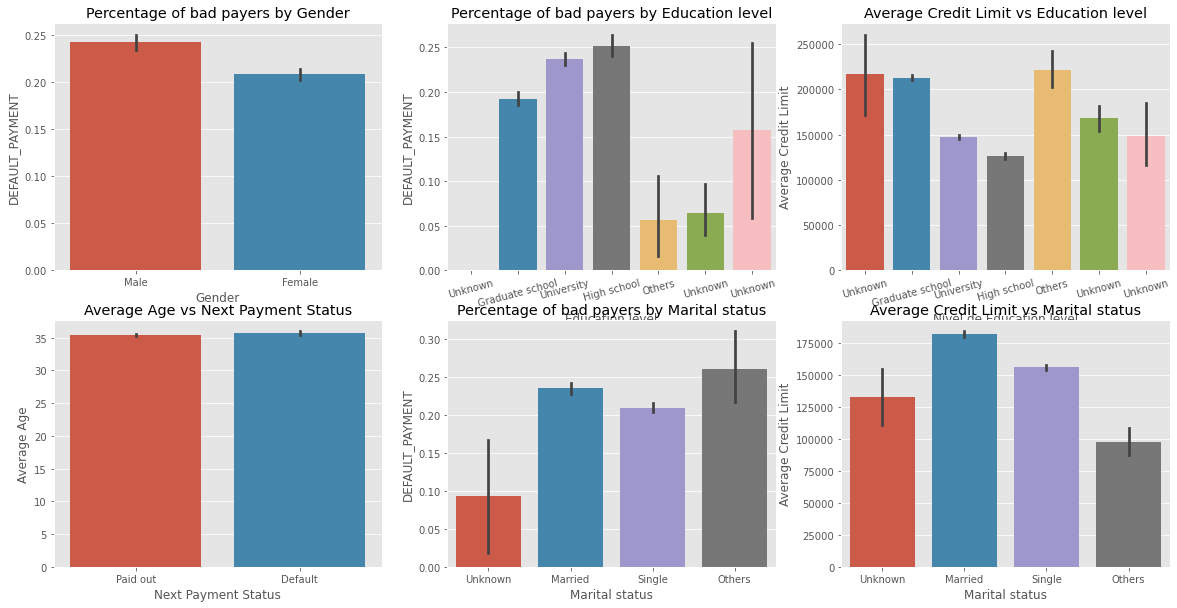

In [420]:
f

In the analysis of the graphs above, it is observed:
         
- Men have a higher default rate than women;
- There is a lower number of defaulters among people with higher education than among people with less education;
- People with more education have, on average, a higher limit than people with less education;
- There is no significant difference in the average age of good payers and bad payers;
- Married customers have a higher percentage of bad debtors than single customers;
- Married clients have, on average, a higher limit than single clients.

### Question 2 - Which variables are the strongest predictors of default payment?

#### Feature Importance

In a model such as Decision Tree, the importance of the feature is calculated by the model. Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

In [450]:
importance = []
for a,b in zip(cred.columns[1:-1], Tree.feature_importances_):
    importance.append([a, b])

importance = pd.DataFrame(importance, columns= ['feature', 'importance']).sort_values(by = 'importance', ascending= False)

In [452]:
importance.head()

,feature,importance
6,PAY_2,0.512589
5,PAY_0,0.171813
8,PAY_4,0.069905
20,PAY_AMT4,0.033306
0,LIMIT_BAL,0.025858


The variable with the greatest importance is **PAY_2**